# Algorithme d'intelligence artificiel

Base de donnée : dossier 2019, hash : 7812f3c2a5ab980c3d0041d97129e0b10e2926bb, fichier de base de donnée : database-2019, hash : 14991a36b6eac28953cd16ad0113803ee9e42c5a

In [1]:
from sklearn.model_selection import train_test_split
import tools
from checksumdir import dirhash
import hashlib
from confusion_matrix.confusion_matrix import plot_confusion_matrix_from_data

# hash directory : https://pypi.org/project/checksumdir/1.0.5/
directory = '../data/2019'
database = '../data/database-2019.csv'

sha1hashdir = dirhash(directory, 'sha1')
sha1hashfile = hashlib.sha1()

with open(database, 'rb') as f:
    while True:
        data = f.read()
        if not data:
            break
        sha1hashfile.update(data)

print(sha1hashdir)
print(sha1hashfile.hexdigest())

TypeError: ../data/data-IA is not a directory.

## Get and split Data

In [5]:
X, y = tools.getData(database, directory)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# stratifié 
# xgboost pour de meilleurs résultats pas dans sk learn

## Nearest Neighbors

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

grid_params = {
    'n_estimators': np.arange(10, 511, 100),
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), grid_params)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'n_estimators': 110}
0.7854945054945054


0.7807017543859649


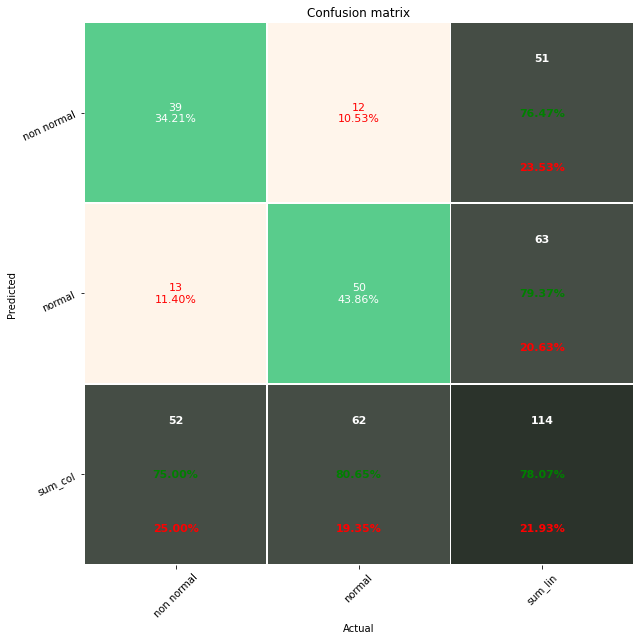

In [7]:
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
plot_confusion_matrix_from_data(y_test, predictions,columns=['non normal','normal'])

In [8]:
from sklearn.metrics import classification_report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=predictions
)
print(sk_report)

              precision    recall  f1-score   support

           0   0.764706  0.750000  0.757282        52
           1   0.793651  0.806452  0.800000        62

    accuracy                       0.780702       114
   macro avg   0.779178  0.778226  0.778641       114
weighted avg   0.780448  0.780702  0.780514       114



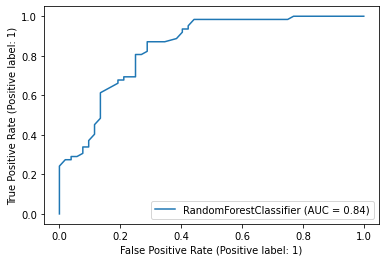

In [9]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
# ajouter le roc score = seuil pour avoir le max de posif pour le min de negatives
# max de recall pour (macro recall) pour éviter de laisser les malades de coté
# retravailler les features pour diminuer
# vecteur composite 
# regarder par nombre de données le nombre max qu'on peut avoir
# faire attention à ce que ce soit reproductible 
# algos de réduction de dimension
# baseline humaine et baseline technique (aléatoire)
# l'humain regarde peut-êre en plus 
# ex origine 
# essayer fourier en gardant n coeff

[215 237]


Text(0.5, 1.0, 'Test')

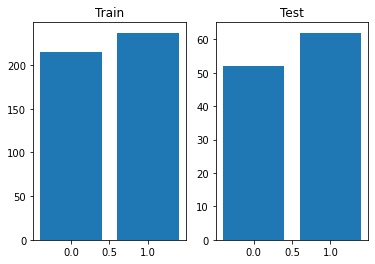

In [21]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
temp_train, n = np.histogram(np.array(y_train),2)
temp_test, n = np.histogram(np.array(y_test),2)
print(temp_train)
ax1.bar([0,1], temp_train)
ax1.set_title("Train")
ax2.bar([0,1],temp_test)
ax2.set_title("Test")